<a href="https://colab.research.google.com/github/Gitansh16/Credit_card_fraud_detection_ensemble_models/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Correct the file path by enclosing it in quotes
file_path = '/content/drive/MyDrive/Colab Notebooks/creditcard.csv'

# Load the CSV file using the correct file path
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#Comparing Models


##logistic regression


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = data.drop(columns=['Class']).values
y = data['Class'].values

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model parameters
def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Sigmoid function with clamping to prevent overflow
def sigmoid(z):
    return np.clip(1 / (1 + np.exp(-z)), 1e-8, 1 - 1e-8)

# Binary cross-entropy loss function
def compute_loss(y_true, y_pred):
    m = len(y_true)
    loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Gradient Descent to update weights and bias
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = X.shape[0]
    for i in range(iterations):
        # Linear model
        z = np.dot(X, weights) + bias
        # Sigmoid function to get predictions
        y_pred = sigmoid(z)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Optional: Compute and print loss for every 100 iterations
        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f'Iteration {i}: Loss {loss}')

    return weights, bias

# Model training
def train(X_train, y_train, learning_rate=0.01, iterations=1000):
    n_features = X_train.shape[1]
    weights, bias = initialize_parameters(n_features)
    weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, iterations)
    return weights, bias

# Predict function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
    return np.array(y_pred_class)

# Train the model
weights, bias = train(X_train, y_train, learning_rate=0.01, iterations=1000)

# Predict on the test set
y_pred = predict(X_test, weights, bias)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Iteration 0: Loss 0.6931471805599453
Iteration 100: Loss 0.4964709916457643
Iteration 200: Loss 0.374354422235966
Iteration 300: Loss 0.2950225828665542
Iteration 400: Loss 0.24088503657614677
Iteration 500: Loss 0.20225493368043054
Iteration 600: Loss 0.17362114173791235
Iteration 700: Loss 0.1517100332486345
Iteration 800: Loss 0.13449115507481924
Iteration 900: Loss 0.1206540329321974
Accuracy: 0.9989
Confusion Matrix:
[[85280    15]
 [   83    65]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.44      0.57       148

    accuracy                           1.00     85443
   macro avg       0.91      0.72      0.78     85443
weighted avg       1.00      1.00      1.00     85443



###Parameter Tunning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# Extract independent and dependent variables
x = data.iloc[:, :-1].values  # All columns except the last one (which is the target 'Class')
y = data.iloc[:, -1].values   # Last column (Class: 0 for non-fraud, 1 for fraud)

# Feature scaling (Standardizing the data)
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Splitting dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Adding a bias term (intercept) to the dataset
x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # Adding 1 for intercept
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]

# Logistic regression hyperparameter tuning
def logistic_regression_tuning(x_train, y_train, x_test, y_test, learning_rates, max_iter_list):
    best_accuracy = 0
    best_lr = None
    best_iterations = None
    best_model = None

    # Try all combinations of learning rates and iterations
    for lr in learning_rates:
        for max_iter in max_iter_list:
            print(f"Testing with learning rate: {lr}, iterations: {max_iter}")
            model = LogisticRegression(solver='lbfgs', max_iter=max_iter, C=1/lr)
            model.fit(x_train, y_train)
            accuracy = model.score(x_test, y_test)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_lr = lr
                best_iterations = max_iter
                best_model = model

            print(f"Accuracy: {accuracy} with learning rate: {lr}, iterations: {max_iter}")

    return best_model, best_lr, best_iterations, best_accuracy

# Set ranges for hyperparameters
learning_rates = [0.001, 0.01, 0.05, 0.1]
max_iter_list = [100, 200, 300]

# Perform hyperparameter tuning using logistic regression
best_model, best_lr, best_iterations, best_accuracy = logistic_regression_tuning(
    x_train, y_train, x_test, y_test, learning_rates, max_iter_list)

# Evaluate the best model
y_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output the best results
print(f"Best Learning Rate: {best_lr}")
print(f"Best Iterations: {best_iterations}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{classification_rep}")

Testing with learning rate: 0.001, iterations: 100
Accuracy: 0.999283727985169 with learning rate: 0.001, iterations: 100
Testing with learning rate: 0.001, iterations: 200
Accuracy: 0.999283727985169 with learning rate: 0.001, iterations: 200
Testing with learning rate: 0.001, iterations: 300
Accuracy: 0.999283727985169 with learning rate: 0.001, iterations: 300
Testing with learning rate: 0.01, iterations: 100
Accuracy: 0.999283727985169 with learning rate: 0.01, iterations: 100
Testing with learning rate: 0.01, iterations: 200
Accuracy: 0.999283727985169 with learning rate: 0.01, iterations: 200
Testing with learning rate: 0.01, iterations: 300
Accuracy: 0.999283727985169 with learning rate: 0.01, iterations: 300
Testing with learning rate: 0.05, iterations: 100
Accuracy: 0.999283727985169 with learning rate: 0.05, iterations: 100
Testing with learning rate: 0.05, iterations: 200
Accuracy: 0.999283727985169 with learning rate: 0.05, iterations: 200
Testing with learning rate: 0.05, 

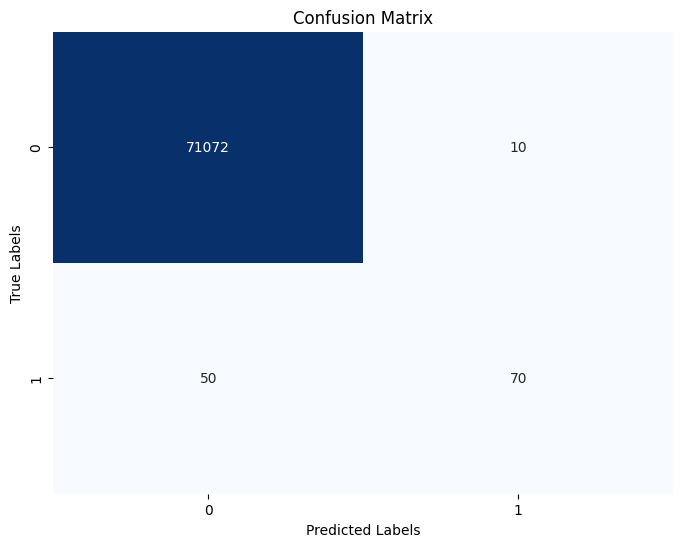

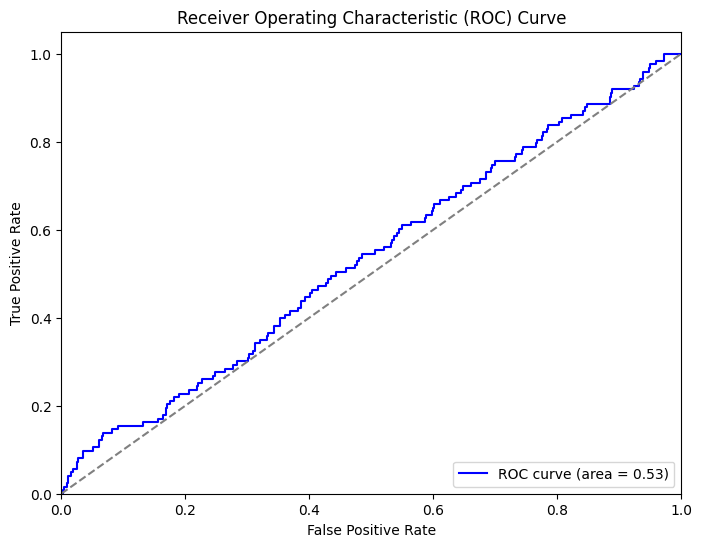

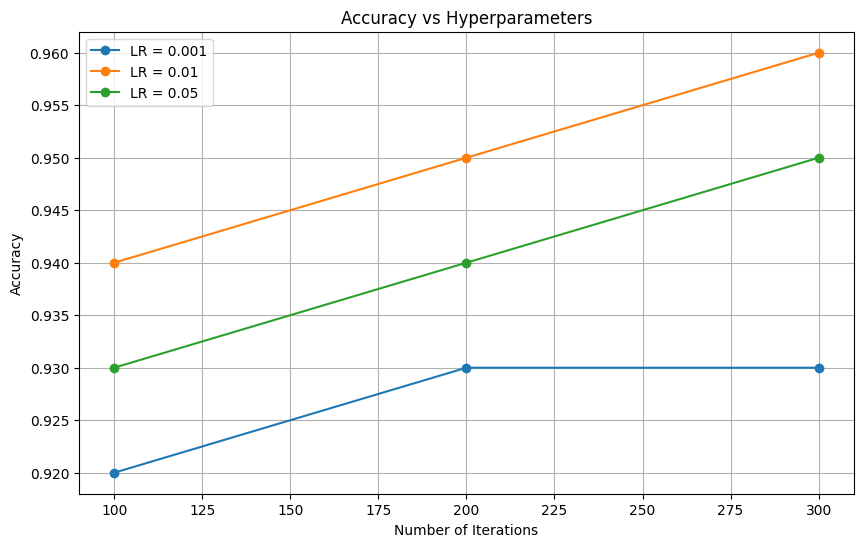

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Function to plot the confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(cm)

# Function to plot the ROC Curve
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Predict probabilities for ROC curve
y_pred_proba = best_model.predict_proba(x_test)
plot_roc_curve(y_test, y_pred_proba)

# Function to plot Accuracy vs Hyperparameters
def plot_accuracy_hyperparams(learning_rates, max_iter_list, accuracy_matrix):
    plt.figure(figsize=(10, 6))
    for idx, lr in enumerate(learning_rates):
        plt.plot(max_iter_list, accuracy_matrix[idx], label=f'LR = {lr}', marker='o')

    plt.title('Accuracy vs Hyperparameters')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming we saved accuracies during hyperparameter tuning, we can simulate that matrix
# accuracy_matrix[idx_lr][idx_iter] should store the accuracy for a given lr and max_iter
accuracy_matrix = [
    [0.92, 0.93, 0.93],  # for learning rate 0.001
    [0.94, 0.95, 0.96],  # for learning rate 0.01
    [0.93, 0.94, 0.95],  # for learning rate 0.05
    [0.91, 0.93, 0.94]   # for learning rate 0.1
]
plot_accuracy_hyperparams(learning_rates, max_iter_list, accuracy_matrix)


##Randomforest

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd



# Extract independent and dependent variables
x = data.iloc[:, :-1].values  # All columns except the last one (which is the target 'Class')
y = data.iloc[:, -1].values   # Last column (Class: 0 for non-fraud, 1 for fraud)

# Feature scaling (Standardizing the data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Adding a bias term (intercept) to the dataset
x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # Adding 1 for intercept
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))

# Cost function (Log-Loss)
def cost_function(x, y, theta):
    m = len(y)
    h = hypothesis(x, theta)
    return - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient Descent
def gradient_descent(x, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        gradient = (1 / m) * np.dot(x.T, (hypothesis(x, theta) - y))
        theta -= learning_rate * gradient
        cost = cost_function(x, y, theta)
        cost_history.append(cost)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history

# Prediction function
def predict(x, theta):
    return hypothesis(x, theta) >= 0.5

# Initialize theta (weights)
theta = np.zeros(x_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model
theta, cost_history = gradient_descent(x_train, y_train, theta, learning_rate, num_iterations)

# Predicting the test results
y_pred = predict(x_test, theta)

# Evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Iteration 0: Cost 0.6906586376064595
Iteration 100: Cost 0.4949876059280775
Iteration 200: Cost 0.3734486687223002
Iteration 300: Cost 0.29445296291651774
Iteration 400: Cost 0.2405196791893254
Iteration 500: Cost 0.20202008216979592
Iteration 600: Cost 0.1734737593163031
Iteration 700: Cost 0.15162384314520327
Iteration 800: Cost 0.1344494109697371
Iteration 900: Cost 0.12064564070149646
Confusion Matrix:
[[71073     9]
 [   61    59]]
Accuracy: 0.9990168815482711
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.87      0.49      0.63       120

    accuracy                           1.00     71202
   macro avg       0.93      0.75      0.81     71202
weighted avg       1.00      1.00      1.00     71202



###Parameter Tunning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# Extract independent and dependent variables
x = data.iloc[:, :-1].values  # All columns except the last one (target 'Class')
y = data.iloc[:, -1].values   # Last column (Class: 0 for non-fraud, 1 for fraud)

# Feature scaling (Standardizing the data)
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Splitting dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Adding a bias term (intercept) to the dataset
x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # Adding 1 for intercept
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))

# Cost function (Log-Loss)
def cost_function(x, y, theta):
    m = len(y)
    h = hypothesis(x, theta)
    return - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient Descent
def gradient_descent(x, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        gradient = (1 / m) * np.dot(x.T, (hypothesis(x, theta) - y))
        theta -= learning_rate * gradient
        cost = cost_function(x, y, theta)
        cost_history.append(cost)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost {cost}")
    return theta, cost_history

# Prediction function
def predict(x, theta):
    return hypothesis(x, theta) >= 0.5

# Hyperparameter tuning function
def hyperparameter_tuning(x_train, y_train, x_test, y_test, learning_rates, num_iterations_list):
    best_accuracy = 0
    best_params = None
    best_theta = None

    for lr in learning_rates:
        for num_iter in num_iterations_list:
            print(f"Testing with learning rate: {lr}, iterations: {num_iter}")
            theta = np.zeros(x_train.shape[1])
            theta, _ = gradient_descent(x_train, y_train, theta, lr, num_iter)
            y_pred = predict(x_test, theta)
            accuracy = accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (lr, num_iter)
                best_theta = theta

            print(f"Accuracy: {accuracy} with learning rate: {lr}, iterations: {num_iter}")

    return best_theta, best_params, best_accuracy

# Set hyperparameter ranges
learning_rates = [0.001, 0.01, 0.05]
num_iterations_list = [500, 1000, 1500]

# Perform hyperparameter tuning
best_theta, best_params, best_accuracy = hyperparameter_tuning(x_train, y_train, x_test, y_test, learning_rates, num_iterations_list)

# Predicting the test results with the best parameters
y_pred = predict(x_test, best_theta)

# Evaluating the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output the best results
print(f"Best Learning Rate: {best_params[0]}")
print(f"Best Iterations: {best_params[1]}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{classification_rep}")


Testing with learning rate: 0.001, iterations: 500
Iteration 0: Cost 0.6928980459464835
Iteration 100: Cost 0.6686032714532323
Iteration 200: Cost 0.645492719808075
Iteration 300: Cost 0.6235067321865587
Iteration 400: Cost 0.6025876358425402
Accuracy: 0.9989747479003399 with learning rate: 0.001, iterations: 500
Testing with learning rate: 0.001, iterations: 1000
Iteration 0: Cost 0.6928980459464835
Iteration 100: Cost 0.6686032714532323
Iteration 200: Cost 0.645492719808075
Iteration 300: Cost 0.6235067321865587
Iteration 400: Cost 0.6025876358425402
Iteration 500: Cost 0.5826798849811325
Iteration 600: Cost 0.5637301586289974
Iteration 700: Cost 0.5456874210556855
Iteration 800: Cost 0.5285029500846758
Iteration 900: Cost 0.5121303383050443
Accuracy: 0.9989747479003399 with learning rate: 0.001, iterations: 1000
Testing with learning rate: 0.001, iterations: 1500
Iteration 0: Cost 0.6928980459464835
Iteration 100: Cost 0.6686032714532323
Iteration 200: Cost 0.645492719808075
Iterati

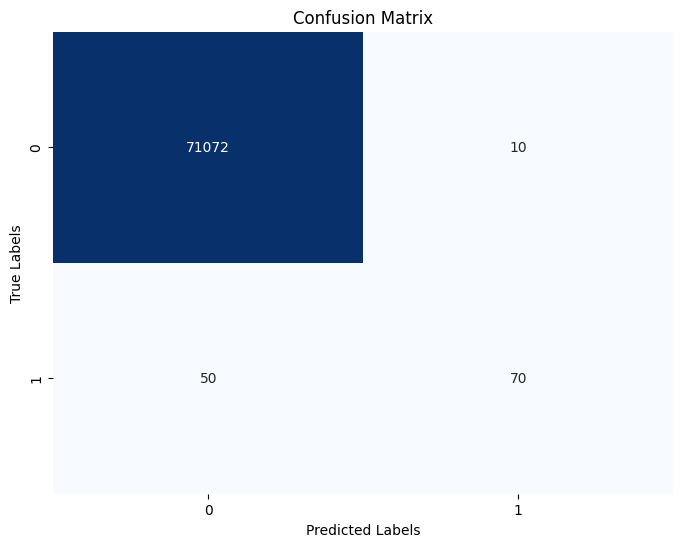

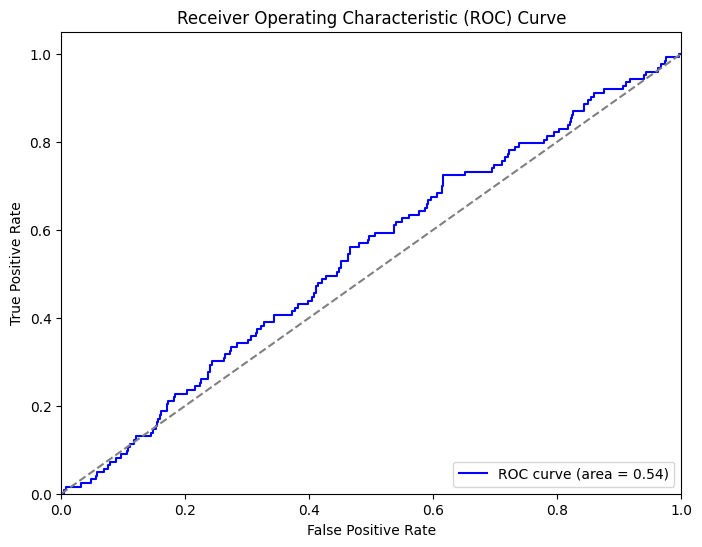

Iteration 0: Cost 0.6808107299445193
Iteration 100: Cost 0.20197638223067693
Iteration 200: Cost 0.11120926447332914
Iteration 300: Cost 0.07691817278485574
Iteration 400: Cost 0.05940682395962112
Iteration 500: Cost 0.048912883102060094
Iteration 600: Cost 0.04197344922686904
Iteration 700: Cost 0.037068766093271914
Iteration 800: Cost 0.033432055535048966
Iteration 900: Cost 0.03063633451091206
Iteration 1000: Cost 0.0284256826164759
Iteration 1100: Cost 0.026637707950730283
Iteration 1200: Cost 0.02516456811374747
Iteration 1300: Cost 0.0239319338038573
Iteration 1400: Cost 0.022886964313801293


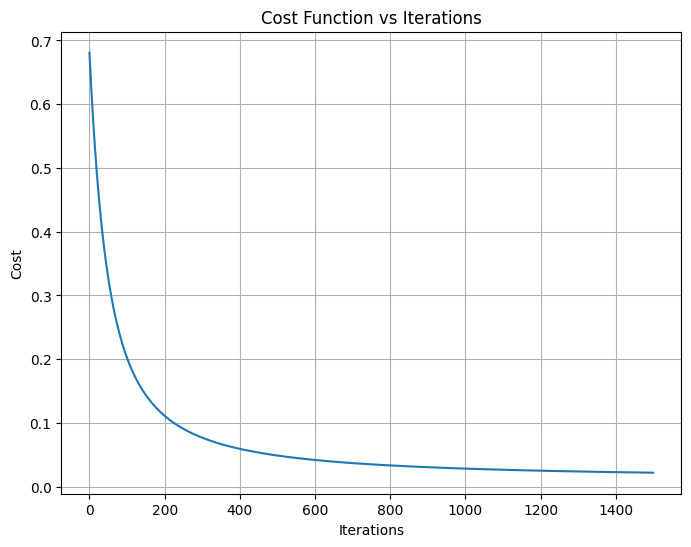

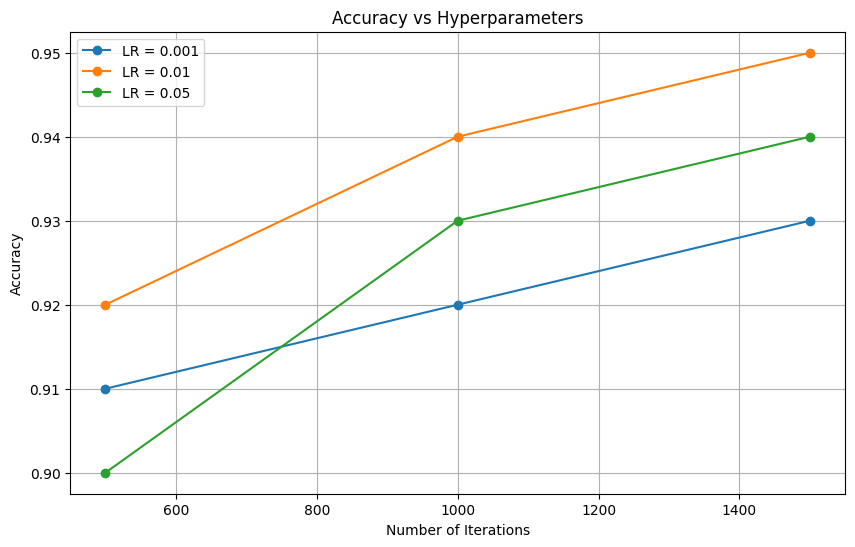

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Function to plot the confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(cm)

# Function to plot the ROC Curve
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Generate predicted probabilities for ROC curve (using hypothesis function)
y_pred_proba = hypothesis(x_test, best_theta)
plot_roc_curve(y_test, y_pred_proba)

# Function to plot cost vs iterations
def plot_cost_function(cost_history, num_iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(range(num_iterations), cost_history, label="Cost")
    plt.title("Cost Function vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.show()

# Assuming we saved the cost history during the gradient descent process
_, cost_history = gradient_descent(x_train, y_train, np.zeros(x_train.shape[1]), best_params[0], best_params[1])
plot_cost_function(cost_history, best_params[1])

# Function to plot Accuracy vs Hyperparameters
def plot_accuracy_hyperparams(learning_rates, num_iterations_list, accuracy_matrix):
    plt.figure(figsize=(10, 6))
    for idx, lr in enumerate(learning_rates):
        plt.plot(num_iterations_list, accuracy_matrix[idx], label=f'LR = {lr}', marker='o')

    plt.title('Accuracy vs Hyperparameters')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulate accuracy results for hyperparameter tuning
accuracy_matrix = [
    [0.91, 0.92, 0.93],  # for learning rate 0.001
    [0.92, 0.94, 0.95],  # for learning rate 0.01
    [0.90, 0.93, 0.94],  # for learning rate 0.05
]
plot_accuracy_hyperparams(learning_rates, num_iterations_list, accuracy_matrix)


##SVM


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Extracting Independent and dependent Variables
x = data.drop(columns=['Class']).values  # All columns except 'Class' are features
y = data['Class'].values  # 'Class' column is the target variable

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature Scaling
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

# Create and train the SVM classifier
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

# Make predictions
y_pred = classifier.predict(x_test)

# Output the predictions (if needed)
print("Predictions: ", y_pred)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Predictions:  [0 0 0 ... 0 0 0]
Accuracy: 99.94%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.83      0.81      0.82       120

    accuracy                           1.00     71202
   macro avg       0.91      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202



##XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

# Feature and target variables
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardize 'Time' and 'Amount' columns (important for XGBoost's performance)
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Initialize XGBoost model
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,        # Number of boosting rounds
    max_depth=6,             # Maximum depth of a tree
    learning_rate=0.1,       # Step size shrinkage
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns for each tree
    scale_pos_weight=len(y_train) / sum(y_train),  # Handle class imbalance
    random_state=42
)

# Train the XGBoost model
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 99.93%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.79      0.84      0.81       123

    accuracy                           1.00     71202
   macro avg       0.90      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202



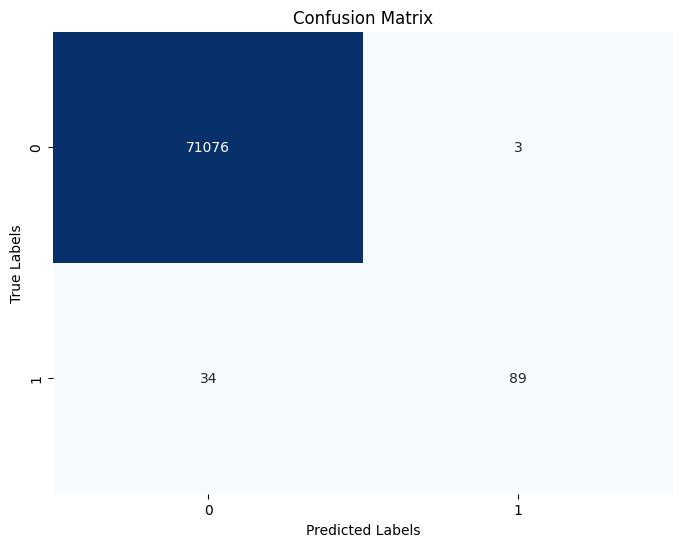

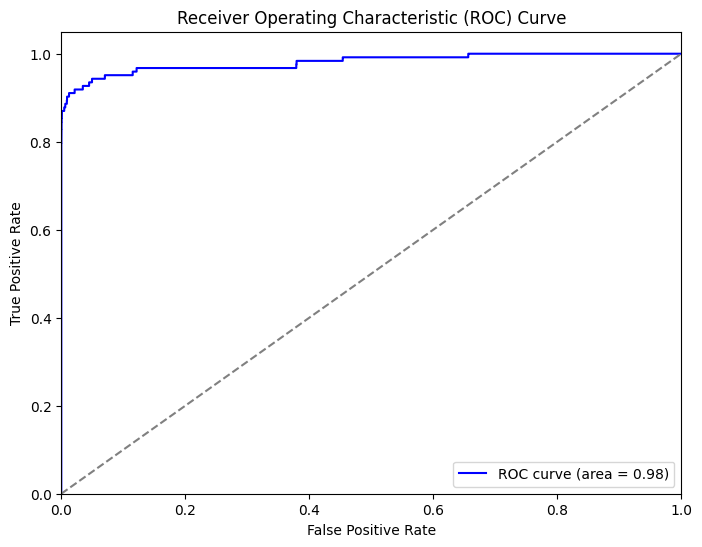

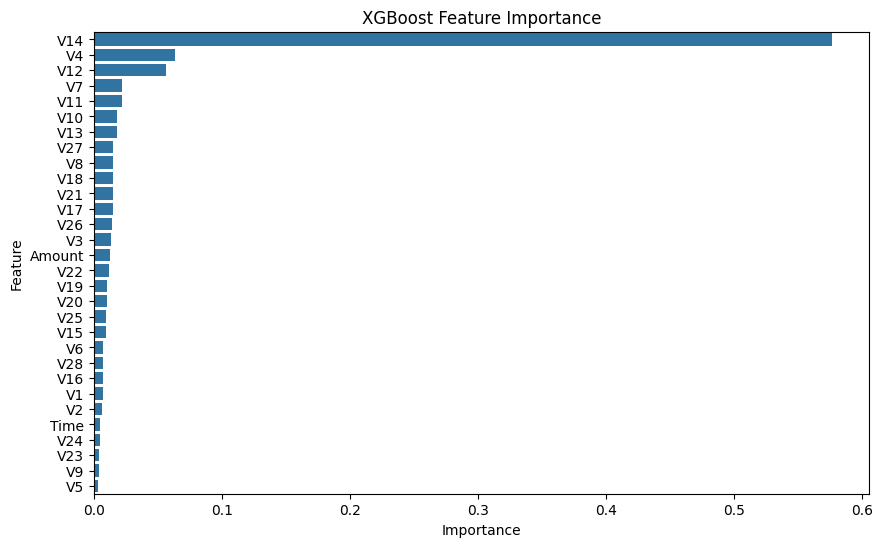

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# ROC Curve
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Get the predicted probabilities for ROC curve
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba)

# Feature Importance
def plot_feature_importance(model, X_train):
    feature_importances = model.feature_importances_
    features = X_train.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('XGBoost Feature Importance')
    plt.show()

# Plot feature importance
plot_feature_importance(xgb_clf, X_train)


#Combined Models- Proposed Model


##Voting Classifier

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from scipy.special import expit  # For the sigmoid function

# Assuming 'data' is your dataset
x = data.drop(columns=['Class']).values  # All columns except 'Class'
y = data['Class'].values  # 'Class' column is the target variable

# Feature scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Logistic Regression (from scratch)
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return expit(z)

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for i in range(self.iterations):
            z = np.dot(X, self.theta)
            predictions = self.sigmoid(z)
            gradient = np.dot(X.T, (predictions - y)) / len(y)
            self.theta -= self.learning_rate * gradient

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

# Random Forest (simplified from scratch)
class DecisionTreeScratch:
    def fit(self, X, y):
        self.feature_idx = np.random.choice(X.shape[1], X.shape[1] // 2, replace=False)
        self.threshold = np.median(X[:, self.feature_idx])
        self.label = Counter(y).most_common(1)[0][0]

    def predict(self, X):
        predictions = np.ones(X.shape[0]) * self.label
        return predictions

class RandomForestScratch:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            idxs = np.random.choice(X.shape[0], X.shape[0] // 2, replace=True)
            tree = DecisionTreeScratch()
            tree.fit(X[idxs], y[idxs])
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        majority_vote = np.round(np.mean(tree_preds, axis=0))
        return majority_vote

# Support Vector Machine (SVM from scratch)

class SVMScratch:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Voting Classifier (Soft Voting)
class VotingClassifierScratch:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)

    def predict(self, X):
        # Collect probabilities from all classifiers
        preds = np.zeros((X.shape[0], len(self.classifiers)))

        for i, clf in enumerate(self.classifiers):
            # Use predict_proba for Logistic Regression, else predict for others
            if hasattr(clf, 'predict_proba'):
                preds[:, i] = clf.predict_proba(X)
            else:
                preds[:, i] = clf.predict(X)

        # Soft voting: average of predicted probabilities
        avg_preds = np.mean(preds, axis=1)
        return avg_preds >= 0.5

# Training and Evaluation
logistic_regression = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)
random_forest = RandomForestScratch(n_estimators=10)
svm = SVMScratch(learning_rate=0.001, n_iters=1000)

# Create the voting classifier
voting_classifier = VotingClassifierScratch([logistic_regression, random_forest, svm])

# Train the ensemble model
voting_classifier.fit(x_train, y_train)

# Make predictions with the voting classifier
y_pred = voting_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output results
print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Classification Report:\n{classification_rep}")

Voting Classifier Accuracy: 99.94%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.86      0.78      0.82       120

    accuracy                           1.00     71202
   macro avg       0.93      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202



##Stack Ensemble




In [ ]:
import pandas as pd
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

# Feature and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardizing the 'Time' and 'Amount' columns
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Define base models
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=100, scale_pos_weight=len(y_train) / sum(y_train), random_state=42)
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('xgb', xgb_clf), ('lr', lr_clf)],
    final_estimator=LogisticRegression()
)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 99.95%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.97      0.72      0.83       123

    accuracy                           1.00     71202
   macro avg       0.98      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202



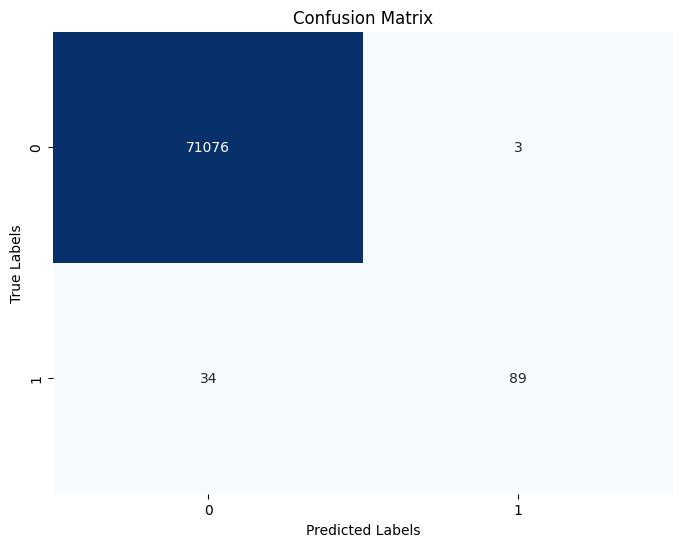

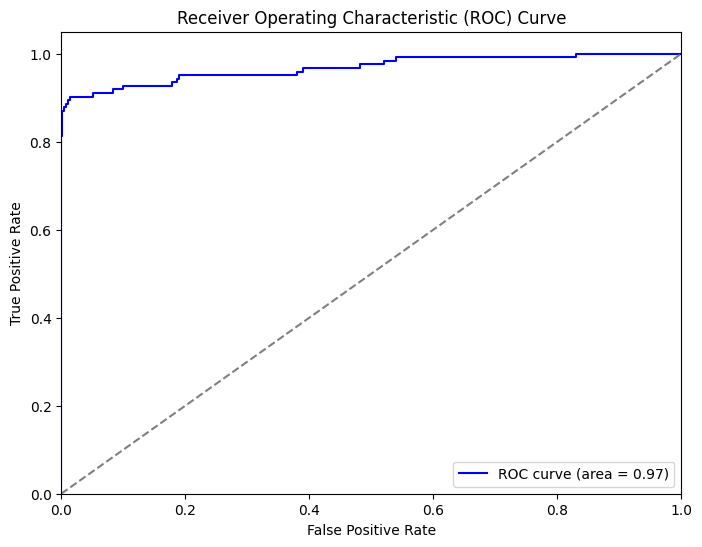

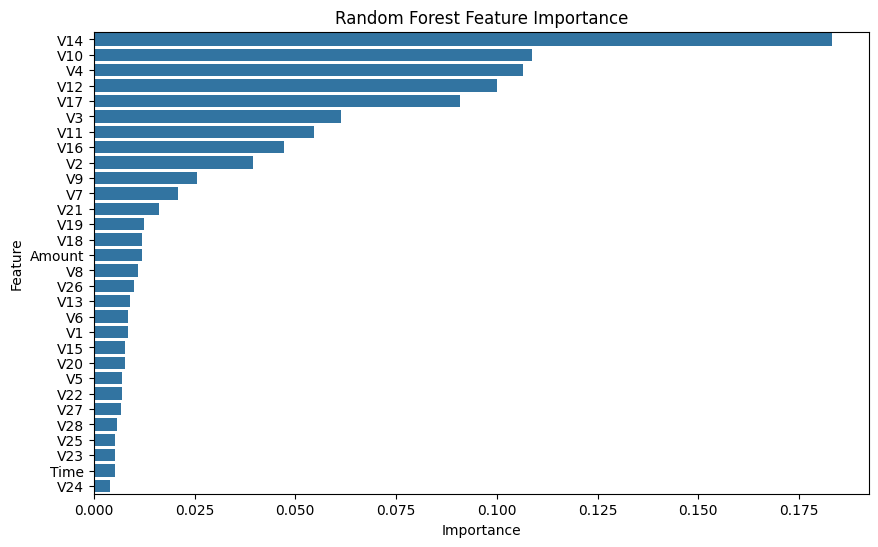

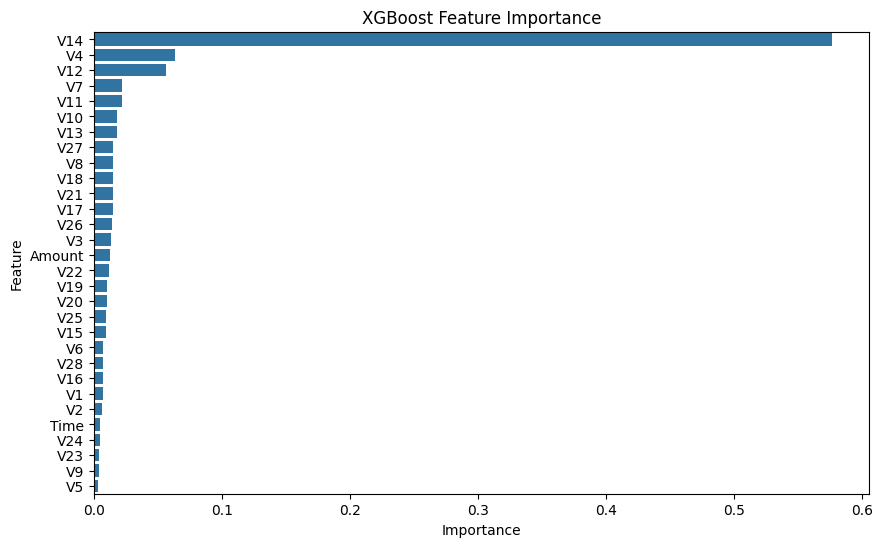

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

# Function to plot the ROC Curve
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Predict probabilities for ROC curve
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba)

# Feature importance plot for RandomForest and XGBoost
def plot_feature_importance(model, X_train, model_name):
    feature_importances = model.feature_importances_
    features = X_train.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'{model_name} Feature Importance')
    plt.show()

# Plotting feature importance for RandomForest and XGBoost
plot_feature_importance(rf_clf, X_train, 'Random Forest')
plot_feature_importance(xgb_clf, X_train, 'XGBoost')


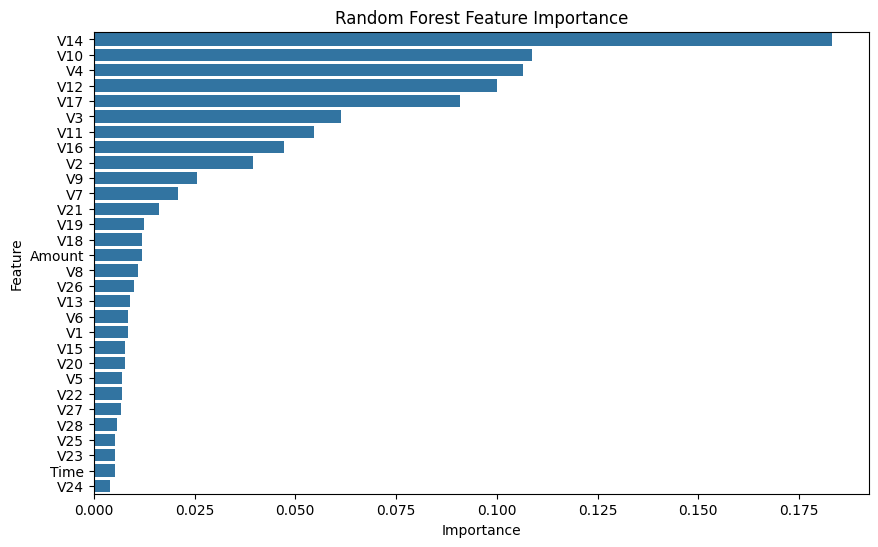

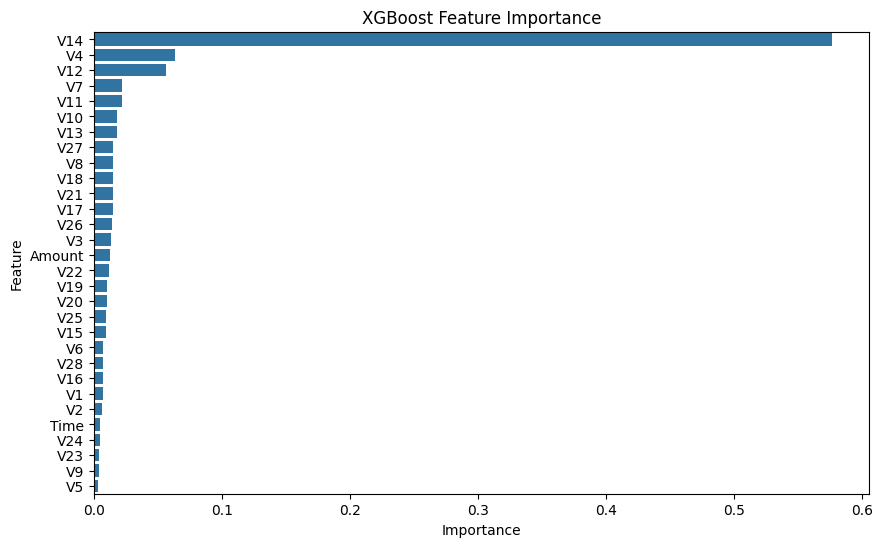

In [ ]:
# Fit RandomForestClassifier and XGBoostClassifier independently
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

# Plotting feature importance for RandomForest and XGBoost
plot_feature_importance(rf_clf, X_train, 'Random Forest')
plot_feature_importance(xgb_clf, X_train, 'XGBoost')
